# Reading from a web service
Next let's read data from a web service. A web service is a function that can be accessed by other programs over the web, as distinct from a web page intended for humans to read or view. A web service is sometimes also called a web API, which stands for Application Programming Interface (as opposed to GUI or Graphical User Interface). 

We'll use a  web service from our own City Futures Research Centre's [CityData](https://citydata.be.unsw.edu.au) website.

Let's focus on a large dataset of Airbnb listings. The data is originally from [airbnb.com](https://airbnb.com), the world's largest online marketplace for people to lease or rent short-term lodging. It was scraped by [Inside Airbnb](http://insideairbnb.com/), a site that analyses and publishes Airbnb data to examine the impact ot Airbnb on cities.

At City Futures Research Centre we simply collated data from Inside Airbnb into [‘Inside Airbnb’ listings for 44 cities, 2015-17](https://citydata.be.unsw.edu.au/layers/geonode%3AInsideAirbnb_44_2015_17), which we republished on the CityData website.

Now let's see how we can access this data in a Python program.


CityData web services are powered by [Geoserver](https://citydata.be.unsw.edu.au/geoserver), an open source software package. Geoserver supports open standards for geospatial data:
- Web Map Service (map images)
- Web Feature Service (vector data)
- Web Coverage Service (raster data)
- Catalog Services for the Web (metadata)

The Airbnb data is vector data: each Airbnb listing has its geographic coordinates and a number of other attributes like the nightly price. So we'll use the [Web Feature Service (WFS)](https://www.google.com.au/search?q=Web+Feature+Service). Like the other services, it's an [Open Geospatial Consortium (OGC) standard](http://www.opengeospatial.org/standards) as well as an ISO standard:

Our Geoserver WFS can provide data in [several formats](http://docs.geoserver.org/latest/en/user/services/wfs/outputformats.html):
- GML
- Shapefile
- JSON
- CSV

WFS supports a getFeature request to return data. In fact CityData uses this to give users access to data in a range of formats including CSV. We can use that to read data into Python with pandas.

To get a WFS request URL, go to the [‘Inside Airbnb’ listings for 44 cities, 2015-17](https://citydata.be.unsw.edu.au/layers/geonode%3AInsideAirbnb_44_2015_17) page and click `Download or Connect to Layer`. Now right-click on WFS and copy the URL to your clipboard.

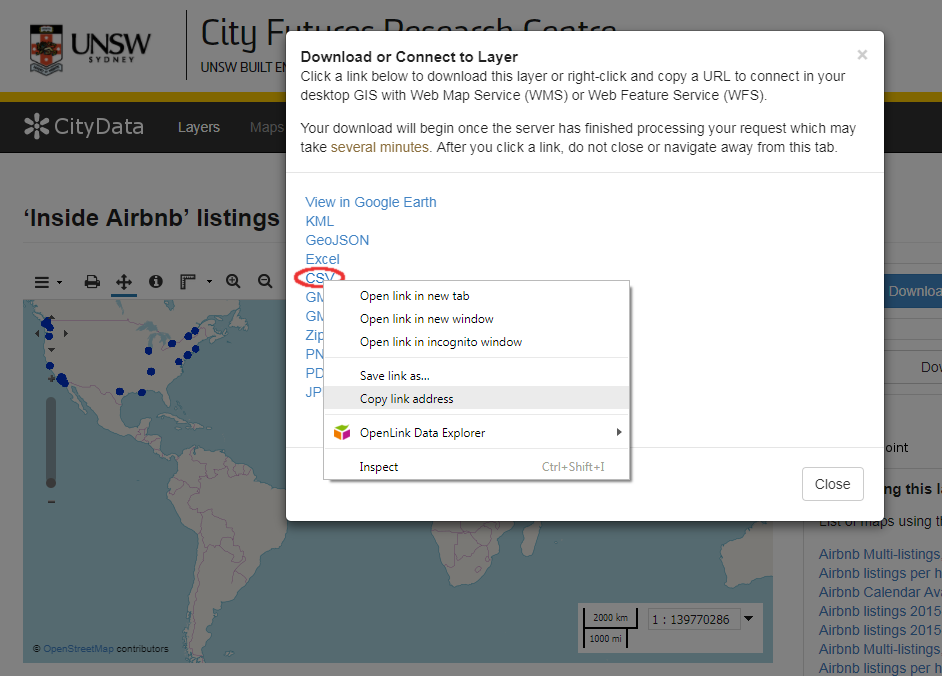


You should have this URL:

<https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=csv&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10>


This is a big dataset so let's add `&maxFeatures=10` to give us just a small sample of records.  
<https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=csv&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10>

As we saw in the last notebook, we can use pandas to read CSV from this URL and show the first 5 rows with the `head()` method:

In [7]:
import pandas
my_data = pandas.read_csv('https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=csv&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10')
my_data.head()

,FID,the_geom,City,ScrapeDate,PropertyID,HostID,NeighGroup,Neighb,Latitude,Longitude,ListType,Price,MinNights,NumReviews,LastReview,RePerMonth,ListingCnt,AvlNext365
0,InsideAirbnb_44_2015_17.1,POINT (4.89004486908833 52.350124034610864),Amsterdam,2015-08-21T00:00:00,4665658,24140025,NaN,De Pijp - Rivierenbuurt,52.350124,4.890045,Entire home/apt,200,2,0,NaN,0.00,1,243
1,InsideAirbnb_44_2015_17.2,POINT (4.887294009637566 52.35427486836833),Amsterdam,2015-08-21T00:00:00,4672877,24172992,NaN,De Pijp - Rivierenbuurt,52.354275,4.887294,Entire home/apt,99,4,2,2015-07-11T00:00:00,0.28,1,14
2,InsideAirbnb_44_2015_17.3,POINT (4.898353403489761 52.35361522862101),Amsterdam,2015-08-21T00:00:00,4714161,24358999,NaN,De Pijp - Rivierenbuurt,52.353615,4.898353,Private room,109,1,25,2015-08-15T00:00:00,3.21,1,298
3,InsideAirbnb_44_2015_17.4,POINT (4.888914546678877 52.355634299021666),Amsterdam,2015-08-21T00:00:00,4734132,4979621,NaN,De Pijp - Rivierenbuurt,52.355634,4.888915,Entire home/apt,125,2,3,2015-07-28T00:00:00,0.37,78,0
4,InsideAirbnb_44_2015_17.5,POINT (4.891473145938366 52.35630030016324),Amsterdam,2015-08-21T00:00:00,4735860,15041379,NaN,De Pijp - Rivierenbuurt,52.356300,4.891473,Private room,90,1,8,2015-08-01T00:00:00,1.03,1,354


Next we'll read GeoJSON, which is the geographic flavour of JavaScript Object Notation (JSON) format. Unlike CSV which handles only a single table with optional headers, JSON supports nested data structures. Yet it is compact, easy for a human to read and write and well-supported by code libraries.

Right-click `GeoJSON` and select `Copy link address`.

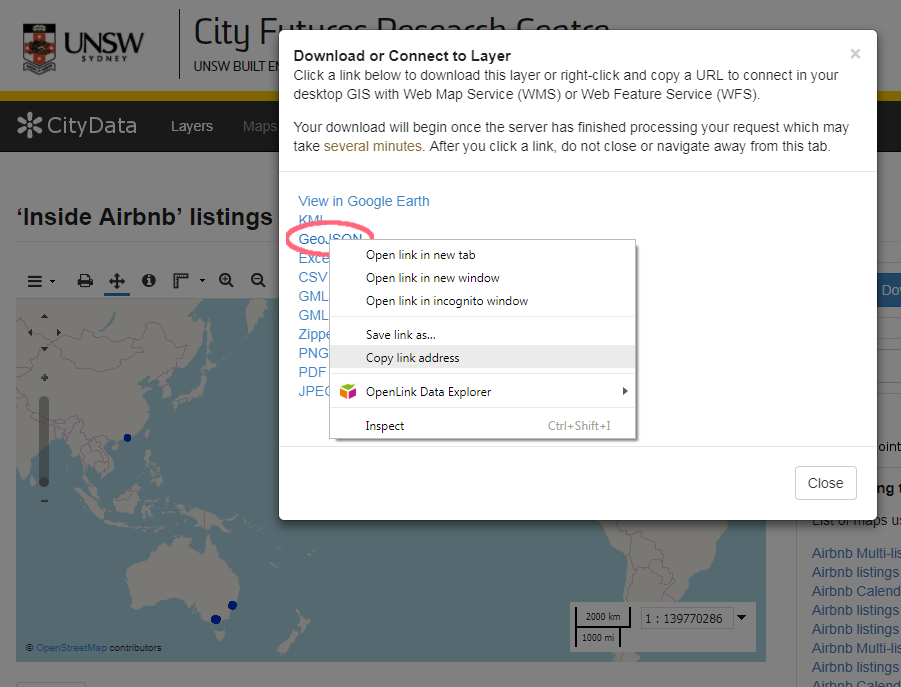

Did you get this URL?  
<https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature>

If you clicked that URL, you're probably still waiting for a response. Go back to that tab and press Esc to cancel the request.

This is a big dataset so let's add `&maxFeatures=10` to give us just a small sample of records.  
<https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10>

OK so now we have a URL to read the JSON from.

How do you read JSON in Python? If you Google that you might find this example code that reads data from a Google Maps API. Let's run it and see what it outputs.

In [17]:
# Source: Stackoverflow
# https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script/12965254#12965254

import urllib.request, json 
with urllib.request.urlopen("http://maps.googleapis.com/maps/api/geocode/json?address=google") as url:
    data = json.loads(url.read().decode())
    print(data)


{'results': [{'address_components': [{'long_name': '747', 'short_name': '747', 'types': ['street_number']}, {'long_name': '6th Street South', 'short_name': '6th St S', 'types': ['route']}, {'long_name': 'Everest', 'short_name': 'Everest', 'types': ['neighborhood', 'political']}, {'long_name': 'Kirkland', 'short_name': 'Kirkland', 'types': ['locality', 'political']}, {'long_name': 'King County', 'short_name': 'King County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Washington', 'short_name': 'WA', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '98033', 'short_name': '98033', 'types': ['postal_code']}], 'formatted_address': '747 6th St S, Kirkland, WA 98033, USA', 'geometry': {'location': {'lat': 47.6697163, 'lng': -122.1978005}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 47.67106528029149, 'lng': -122.1964515197085}, 'southwest': {

Great! We got some data.

To read it more easily, we can copy/paste it to an [online code formatter](https://jsonformatter.curiousconcept.com/).

You can see it's the address of a building at Google (in pedantic detail).

Now let's try to open our dataset with the same code.

In [2]:
# Source: Stackoverflow
# https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script/12965254#12965254

import urllib.request, json 
with urllib.request.urlopen("https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10") as url:
    data = json.loads(url.read().decode())
    print(data)

{'type': 'FeatureCollection', 'totalFeatures': 1049017, 'features': [{'type': 'Feature', 'id': 'InsideAirbnb_44_2015_17.13560', 'geometry': {'type': 'Point', 'coordinates': [-97.72953782953249, 30.24609503895619]}, 'geometry_name': 'the_geom', 'properties': {'City': 'Austin', 'ScrapeDate': '2015-05-23T00:00:00Z', 'PropertyID': 720315, 'HostID': 393905, 'NeighGroup': '', 'Neighb': '78741', 'Latitude': 30.246095039, 'Longitude': -97.7295378295, 'ListType': 'Entire home/apt', 'Price': 150, 'MinNights': 2, 'NumReviews': 11, 'LastReview': '2015-04-07T00:00:00Z', 'RePerMonth': 0.4, 'ListingCnt': 1, 'AvlNext365': 248}}, {'type': 'Feature', 'id': 'InsideAirbnb_44_2015_17.13561', 'geometry': {'type': 'Point', 'coordinates': [-97.7453269949299, 30.226628019326462]}, 'geometry_name': 'the_geom', 'properties': {'City': 'Austin', 'ScrapeDate': '2015-05-23T00:00:00Z', 'PropertyID': 2948580, 'HostID': 13246317, 'NeighGroup': '', 'Neighb': '78741', 'Latitude': 30.2266280193, 'Longitude': -97.745326994

It worked! What can we do with that data? Let's start by printing just one value from it: `totalFeatures`, which is the number of features that match the WFS query.

In [3]:
# Source: Stackoverflow
# https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script/12965254#12965254

import urllib.request, json 
with urllib.request.urlopen("https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10") as url:
    data = json.loads(url.read().decode())
    print(data["totalFeatures"])

1049017


Now let's get a value from deeper in the data structure: the neighbourhood of the first airbnb listing.

In [4]:
# Source: Stackoverflow
# https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script/12965254#12965254

import urllib.request, json 
with urllib.request.urlopen("https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10") as url:
    data = json.loads(url.read().decode())
    print(data['features'][0]['properties']['Neighb'])

78741


In [5]:
# Source: Stackoverflow
# https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script/12965254#12965254

import urllib.request, json 
with urllib.request.urlopen("https://citydata.be.unsw.edu.au/geoserver/wfs?srsName=EPSG%3A4326&typename=geonode%3AInsideAirbnb_44_2015_17&outputFormat=json&version=1.0.0&service=WFS&request=GetFeature&maxFeatures=10") as url:
    data = json.loads(url.read().decode())
    for f in data['features']:
        fp = f['properties'] 
    print(data['features'][0]['properties']['Neighb'])

78741
